In [ ]:
pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894079 sha256=4a50b55101c34623cc12e528cf2de48ceb5b4426630c744c20deabc47c3bd47e
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz # used to provide tools for fuzzy logic systems
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

In [ ]:
# Step 1: Define linguistic variables and membership functions
temperature = ctrl.Antecedent(np.arange(0, 101, 1), 'Temperature')
fan_speed = ctrl.Consequent(np.arange(0, 301, 1), 'Fan_Speed')

temperature['Risky'] = fuzz.trimf(temperature.universe, [20, 50, 100])
temperature['Average'] = fuzz.trimf(temperature.universe, [20, 50, 100])
temperature['Excellent'] = fuzz.trimf(temperature.universe, [20, 50, 100])


fan_speed['Slow'] = fuzz.trimf(fan_speed.universe, [0, 0, 150])
fan_speed['Moderate'] = fuzz.trimf(fan_speed.universe, [0, 150, 300])
fan_speed['High'] = fuzz.trimf(fan_speed.universe, [150, 300, 300])


# Step 2: Define fuzzy rules
rule1 = ctrl.Rule(temperature['Risky'], fan_speed['High'])
rule2 = ctrl.Rule(temperature['Average'], fan_speed['Slow'])
rule3 = ctrl.Rule(temperature['Excellent'], fan_speed['Moderate'])

# Step 3: Create control system
fan_speed_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

# Step 4: Simulate the FIS
fan_speed_simulation = ctrl.ControlSystemSimulation(fan_speed_ctrl)

# Set the input Temperature
input_temperature = 60
fan_speed_simulation.input['Temperature'] = input_temperature

# Step 5: Compute the output using centroid defuzzification
fan_speed_simulation.compute()

# Get the crisp value of Fan_Speed
crisp_fan_speed = fan_speed_simulation.output['Fan_Speed']
print("Crisp Fan_Speed:", crisp_fan_speed)
print("IF TEMPERATURE is {}, THEN increase furnace FAN-SPEED to {} RPM".format(input_temperature, crisp_fan_speed))


Crisp Fan_Speed: 149.9999999999998
IF TEMPERATURE is 60, THEN increase furnace FAN-SPEED to 149.9999999999998 RPM


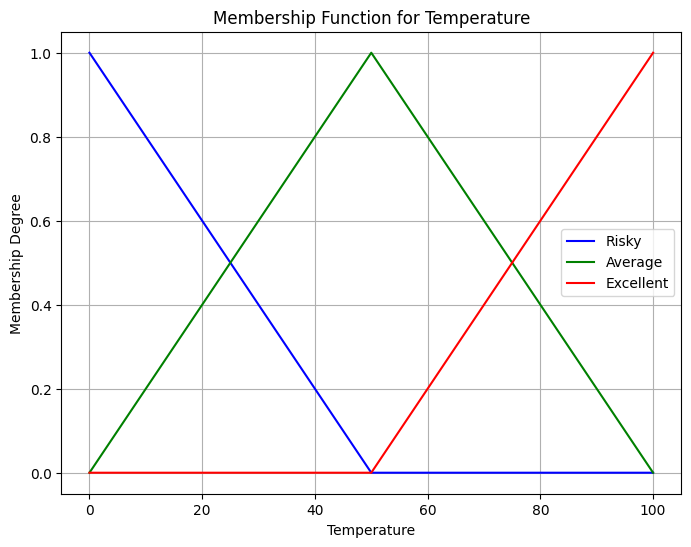

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(temperature.universe, fuzz.trimf(temperature.universe, [0, 0, 50]), 'b', linewidth=1.5, label='Risky')
plt.plot(temperature.universe, fuzz.trimf(temperature.universe, [0, 50, 100]), 'g', linewidth=1.5, label='Average')
plt.plot(temperature.universe, fuzz.trimf(temperature.universe, [50, 100, 100]), 'r', linewidth=1.5, label='Excellent')
plt.title('Membership Function for Temperature')
plt.xlabel('Temperature')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid()
plt.show()
